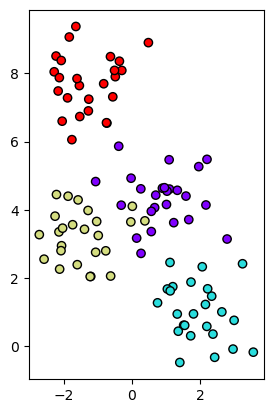

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, z = datasets.make_blobs(n_features=2, n_samples=100,
                          centers=4,
                          cluster_std=.8, random_state=0)
plt.axes(aspect=1).scatter(X[:,0], X[:,1], c=z, cmap='rainbow', 
           edgecolors='k')
plt.show()

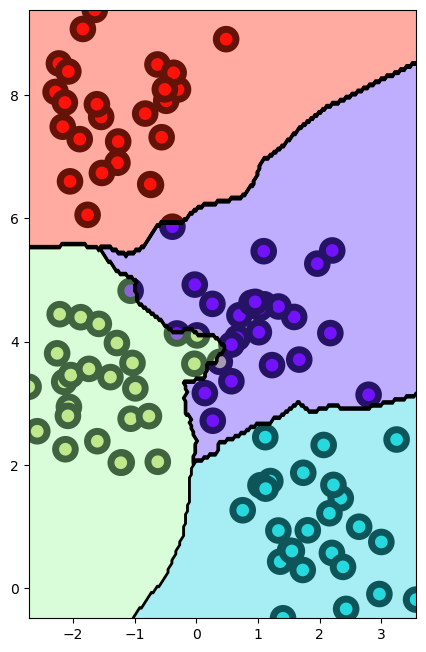

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X, z)

xMinMax = [  X[:,0].min(), X[:,0].max() ]
yMinMax = [  X[:,1].min(), X[:,1].max() ]
nmesh = 200
mx, my = np.meshgrid(
    np.linspace(*xMinMax, nmesh), np.linspace(*yMinMax, nmesh)
)
mX = np.stack([mx.ravel(), my.ravel()], 1)
mz = knn.predict(mX).reshape(nmesh, nmesh)

plt.figure(figsize=(5,15))
plt.axes(aspect=1, xlim=[*xMinMax], ylim=[*yMinMax])
plt.scatter(X[:,0], X[:,1], c=z, edgecolor='k',
           cmap='rainbow', s=200, lw=5)
plt.contour(mx, my, mz, colors='k')
plt.contourf(mx, my, mz, alpha=.4, cmap='rainbow')
plt.show()

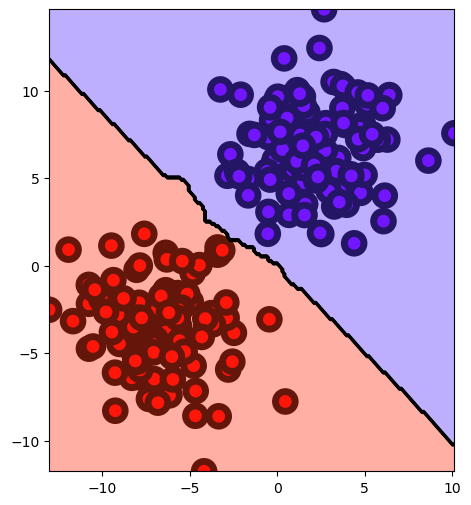

In [23]:
knn = KNeighborsClassifier(n_neighbors=20, p=8)
knn.fit(X, z)

xMinMax = [  X[:,0].min(), X[:,0].max() ]
yMinMax = [  X[:,1].min(), X[:,1].max() ]
nmesh = 200
mx, my = np.meshgrid(
    np.linspace(*xMinMax, nmesh), np.linspace(*yMinMax, nmesh)
)
mX = np.stack([mx.ravel(), my.ravel()], 1)
mz = knn.predict(mX).reshape(nmesh, nmesh)

plt.figure(figsize=(10,6))
plt.axes(aspect=1, xlim=[*xMinMax], ylim=[*yMinMax])
plt.scatter(X[:,0], X[:,1], c=z, edgecolor='k',
           cmap='rainbow', s=200, lw=5)
plt.contour(mx, my, mz, colors='k')
plt.contourf(mx, my, mz, alpha=.4, cmap='rainbow')
plt.show()

In [5]:
import time
X, z = datasets.make_blobs(n_samples=1000,
                          n_features=10, centers=4, random_state=0)
for alg in ['kd_tree', 'ball_tree', 'brute', 'auto']:
    t1 = time.time()
    knn = KNeighborsClassifier(algorithm=alg)
    knn.fit(X, z)
    knn.predict(X)
    print(u'%s : %.3f วินาที' % (alg, time.time() - t1))

kd_tree : 0.059 วินาที
ball_tree : 0.054 วินาที
brute : 0.121 วินาที
auto : 0.063 วินาที


In [6]:
X, z = datasets.make_blobs(n_features=20, 
                          n_samples=2000, centers=3, random_state=0)
# n_samples = 20000 made my laptop froze
for j in [1,2,3]:
    t1 = time.time()
    KNeighborsClassifier(n_jobs=j).fit(X, z).predict(X)
    print('n_jobs={} : {:.3f}' . format(j, time.time() - t1 ))

n_jobs=1 : 0.021
n_jobs=2 : 0.019
n_jobs=3 : 0.018


In [7]:
knn.kneighbors()

(array([[2.16729478, 2.23088475, 2.2751515 , 2.38897706, 2.40717366],
        [2.00037652, 2.84805552, 2.8503066 , 2.93381117, 2.96546377],
        [1.70647109, 2.10196569, 2.37929103, 2.40396072, 2.46888734],
        ...,
        [1.67479523, 1.76821394, 1.78704709, 1.8772054 , 1.98001093],
        [1.2371623 , 1.40486262, 1.85917176, 1.89929088, 2.0015883 ],
        [2.66397466, 2.90556135, 3.08944114, 3.57809667, 3.74215689]]),
 array([[747, 613, 686, 446, 771],
        [720, 596, 191, 493, 644],
        [260, 508, 966, 554, 797],
        ...,
        [202, 965,  50, 453, 137],
        [640, 890, 193, 597, 283],
        [ 97, 720,  18, 143, 347]]))

In [8]:
X.shape

(2000, 20)

In [9]:
X[:,0].shape

(2000,)

In [10]:
X[:,1].shape

(2000,)

In [11]:
X[None].shape

(1, 2000, 20)

In [12]:
v = np.arange(1, 10)
v

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
k = 5*v + 2*v**2
k

array([  7,  18,  33,  52,  75, 102, 133, 168, 207])

In [14]:
g = np.stack([v,k], 1)
g

array([[  1,   7],
       [  2,  18],
       [  3,  33],
       [  4,  52],
       [  5,  75],
       [  6, 102],
       [  7, 133],
       [  8, 168],
       [  9, 207]])

In [15]:
v

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
v[None,None,None]

array([[[[1, 2, 3, 4, 5, 6, 7, 8, 9]]]])

In [17]:
g[None, ]

array([[[  1,   7],
        [  2,  18],
        [  3,  33],
        [  4,  52],
        [  5,  75],
        [  6, 102],
        [  7, 133],
        [  8, 168],
        [  9, 207]]])

In [18]:
g[None].shape # create new dimension

(1, 9, 2)

In [19]:
print(g[:, None].shape)
g[:, None]

(9, 1, 2)


array([[[  1,   7]],

       [[  2,  18]],

       [[  3,  33]],

       [[  4,  52]],

       [[  5,  75]],

       [[  6, 102]],

       [[  7, 133]],

       [[  8, 168]],

       [[  9, 207]]])

In [20]:
new_g = g[:,:,None,]
print(new_g.shape)
print(new_g)

(9, 2, 1)
[[[  1]
  [  7]]

 [[  2]
  [ 18]]

 [[  3]
  [ 33]]

 [[  4]
  [ 52]]

 [[  5]
  [ 75]]

 [[  6]
  [102]]

 [[  7]
  [133]]

 [[  8]
  [168]]

 [[  9]
  [207]]]


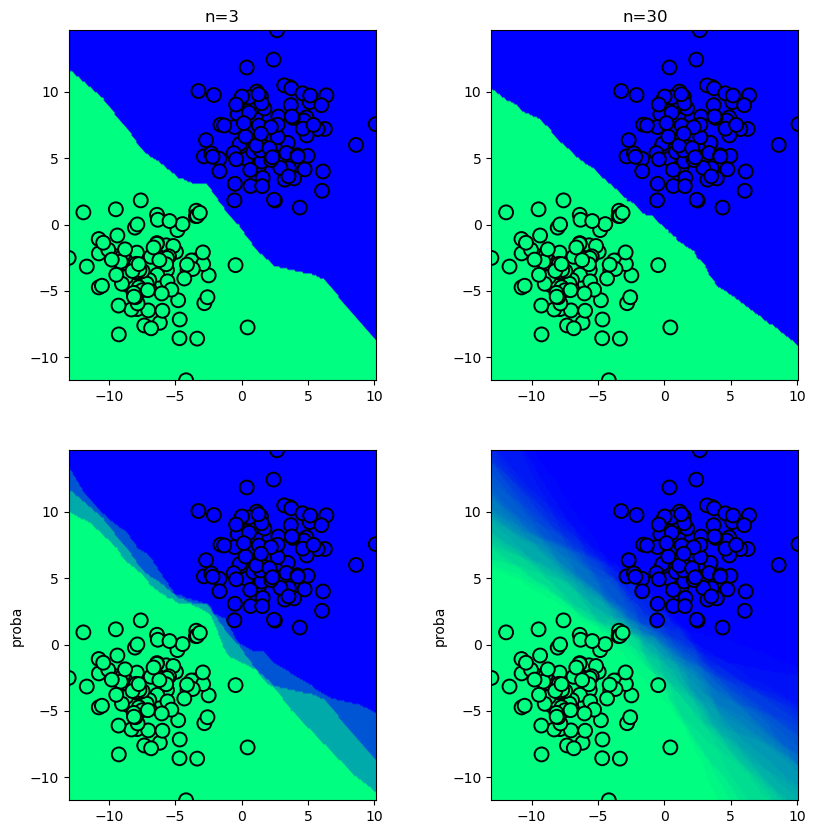

In [21]:
X,z = datasets.make_blobs(n_samples=200,centers=2,cluster_std=2.5)
nmesh = 200
mx,my = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),nmesh),np.linspace(X[:,1].min(),X[:,1].max(),nmesh))
mX = np.stack([mx.ravel(),my.ravel()],1)

plt.figure(figsize=(10,10))
for i in [0,1]:
    n = 3+27*i
    knn = KNeighborsClassifier(n)
    knn.fit(X,z)
    k = knn.kneighbors(X)
    for j in [0,1]:
        if(j==1):
            mz = knn.predict_proba(mX)[:,1].reshape(nmesh,nmesh)
        else:
            mz = knn.predict(mX).reshape(nmesh,nmesh)
        plt.subplot(221+i+2*j,xlim=[X[:,0].min(),X[:,0].max()],ylim=[X[:,1].min(),X[:,1].max()],aspect=1)
        plt.scatter(X[:,0],X[:,1],s=100,lw=1.4,c=z,edgecolor='k',cmap='winter',
                   )
        plt.contourf(mx,my,mz,100,cmap='winter',zorder=0)
        if(j==0):
            plt.title('n=%d'%n)
        else:
            plt.ylabel('proba')
plt.show()